## Problem Statement

The objective of this assignment is to identify different groups of customers based on their purchasing behavior and demographics(**Customer Segmentation** )

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [3]:
test = pd.read_csv("test.csv")
test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [4]:
# merging the training and testing sets

df = pd.concat([train, test], ignore_index=True)
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
783662,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN,NaN
783663,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN,NaN
783664,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0,NaN
783665,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 71.7+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## 1. Dropping the unnecessary features

- The columns User_ID, Product_ID will not be useful is data modeling. So, dropping them

In [7]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
# Making sure there are no spaces in the columns names 

df.columns = df.columns.str.strip()
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [9]:
df = df.drop(['User_ID', 'Product_ID'], axis=1)

In [10]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


## 2. Format the Columns

- The column "Stay_In_Current_City_Years" has special charater "+" in its records. Therefore, we should get rid of these 

In [11]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+','')

## 3. Handling Missing values/ Invalid data 


In [12]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

Checking the distribution of the features **'Product_Category_2', 'Product_Category_3'** and **'Purchase'** to determine the Imputation Method

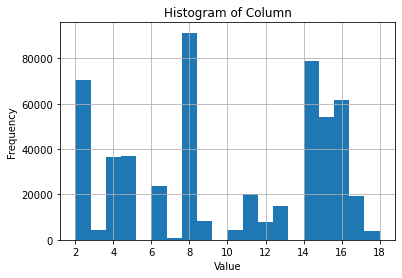

In [13]:
df['Product_Category_2'].hist(bins=20)
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

- The distribution of the column 'Product_Category_2' is not systematic .i.e skewed

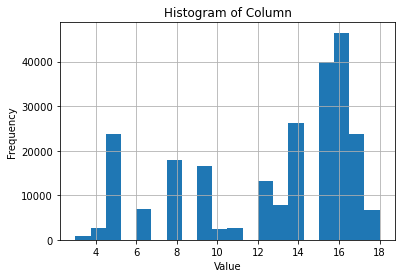

In [14]:
df['Product_Category_3'].hist(bins=20)
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

- The distribution of the column 'Product_Category_3' is not systematic i.e skewed

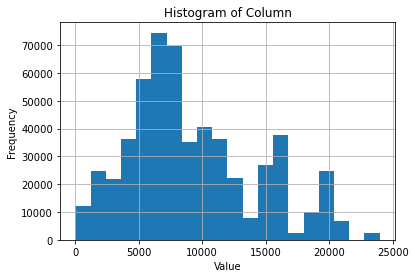

In [15]:
df['Purchase'].hist(bins=20)
plt.title('Histogram of Column')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

- The distribution of the column 'Product_Category_3' is not systematic i.e skewed

Since, the histograms are skewed, using **Median** for Imputing Null values, as median is robust to outliers

In [16]:
df['Product_Category_2'].fillna(df['Product_Category_2'].median(), inplace=True)
df['Product_Category_3'].fillna(df['Product_Category_3'].median(), inplace=True)
df['Purchase'].fillna(df['Purchase'].median(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  object 
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 59.8+ MB


## 4. Encoding the Categorical Values

- In this step, we will encode the categocial values(object type) in the features Gender, Age and City_Category to numerical values, as these features mightbe useful in modeling

In [17]:
#Gender
df['Gender'] = df['Gender'].str.upper() 
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1}) # replacing F with 0, and M with 1

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  object 
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  object 
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 59.8+ MB


In [19]:
#Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [20]:
df['Age'] = df['Age'].map({'0-17': 0, '18-25' : 1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

In [21]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,A,2,0,3,9.0,14.0,8370.0
1,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,0,0,10,A,2,0,12,9.0,14.0,1422.0
3,0,0,10,A,2,0,12,14.0,14.0,1057.0
4,1,6,16,C,4,0,8,9.0,14.0,7969.0


In [22]:
#City_Category
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [23]:
df['City_Category'] = df['City_Category'].map({'A': 0, 'B' : 1,'C':2})

In [24]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,9.0,14.0,1422.0
3,0,0,10,0,2,0,12,14.0,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,14.0,7969.0


In [25]:
df

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,9.0,14.0,1422.0
3,0,0,10,0,2,0,12,14.0,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,14.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
783662,0,2,15,1,4,1,8,9.0,14.0,8047.0
783663,0,2,15,1,4,1,5,8.0,14.0,8047.0
783664,0,2,15,1,4,1,1,5.0,12.0,8047.0
783665,0,4,1,2,4,0,10,16.0,14.0,8047.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   City_Category               783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    783667 non-null  float64
dtypes: float64(3), int64(6), object(1)
memory usage: 59.8+ MB


In [27]:
df.describe()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,783667.00000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000,783667.000000
mean,0.75291,2.496802,8.079300,1.042671,0.409777,5.366196,9.579427,13.595896,8901.209181
std,0.43132,1.352736,6.522206,0.759879,0.491793,3.878160,4.233575,2.353838,4244.999808
min,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.00000,2.000000,2.000000,0.000000,0.000000,1.000000,8.000000,14.000000,6996.000000
50%,1.00000,2.000000,7.000000,1.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.00000,3.000000,14.000000,2.000000,1.000000,8.000000,14.000000,14.000000,9927.000000
max,1.00000,6.000000,20.000000,2.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


## 5. Checking if there any Duplicate Rows

In [28]:
df.shape

(783667, 10)

In [29]:
df.drop_duplicates()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,9.0,14.0,8370.0
1,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,0,0,10,0,2,0,12,9.0,14.0,1422.0
3,0,0,10,0,2,0,12,14.0,14.0,1057.0
4,1,6,16,2,4,0,8,9.0,14.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
783654,1,3,6,2,1,1,1,2.0,8.0,8047.0
783657,1,2,17,2,1,1,2,15.0,14.0,8047.0
783664,0,2,15,1,4,1,1,5.0,12.0,8047.0
783665,0,4,1,2,4,0,10,16.0,14.0,8047.0


In [30]:
df.shape

(783667, 10)

- The shape of the dataset remains same even after applying 'drop_duplicates()'. Therefore, there are no duplicate rows in this dataset

## 6. Addressing Outliers

In [31]:
#Identifying the outliers in the feature 'Purchase'

q1 = 6996.000000  #25th percentile
q3 = 9927.000000  #75th percentile
IQR = q3 - q1
IQR

2931.0

In [32]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
print(lower_limit)
print(upper_limit)

2599.5
14323.5


In [33]:
#Filtering the outliers
outliers = df[ (df['Purchase'] > upper_limit) | (df['Purchase'] < lower_limit)]

In [34]:
# Removing outliers from the dataframe
df = df[~((df['Purchase'] > upper_limit) | (df['Purchase'] < lower_limit))]
df.describe()

,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,635606.000000,635606.000000,635606.000000,635606.000000,635606.000000,635606.000000,635606.000000,635606.000000,635606.000000
mean,0.745496,2.495006,8.041951,1.029400,0.410043,5.450509,9.702064,13.616297,7850.211648
std,0.435582,1.350298,6.533848,0.758303,0.491842,3.440716,4.079899,2.249406,2120.445462
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,2616.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,3.000000,8.000000,14.000000,6995.000000
50%,1.000000,2.000000,7.000000,1.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.000000,3.000000,14.000000,2.000000,1.000000,8.000000,14.000000,14.000000,8082.000000
max,1.000000,6.000000,20.000000,2.000000,1.000000,18.000000,18.000000,18.000000,14323.000000


## 7. Data Type Conversion

Coverting the feature 'Stay_In_Current_City_Years' to type 'int'

In [35]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

<ipython-input-35-2e4d5f43a359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 635606 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      635606 non-null  int64  
 1   Age                         635606 non-null  int64  
 2   Occupation                  635606 non-null  int64  
 3   City_Category               635606 non-null  int64  
 4   Stay_In_Current_City_Years  635606 non-null  int32  
 5   Marital_Status              635606 non-null  int64  
 6   Product_Category_1          635606 non-null  int64  
 7   Product_Category_2          635606 non-null  float64
 8   Product_Category_3          635606 non-null  float64
 9   Purchase                    635606 non-null  float64
dtypes: float64(3), int32(1), int64(6)
memory usage: 50.9 MB


## 8. Rearraning the columns

Rearranging the columns in the dataframe for improved readability

In [ ]:
new_order = [
    'Gender', 'Age', 'Marital_Status','City_Category', 'Stay_In_Current_City_Years',
     'Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
    'Purchase'
]

In [38]:
df = df[new_order]
df.head()

,Gender,Age,Marital_Status,City_Category,Stay_In_Current_City_Years,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,0,0,2,10,3,9.0,14.0,8370.0
4,1,6,0,2,4,16,8,9.0,14.0,7969.0
9,1,2,1,0,1,20,8,9.0,14.0,7871.0
10,1,2,1,0,1,20,5,11.0,14.0,5254.0
11,1,2,1,0,1,20,8,9.0,14.0,3957.0


## EDA

## 1. Plotting the correlation matrix

In [39]:
import seaborn as sns

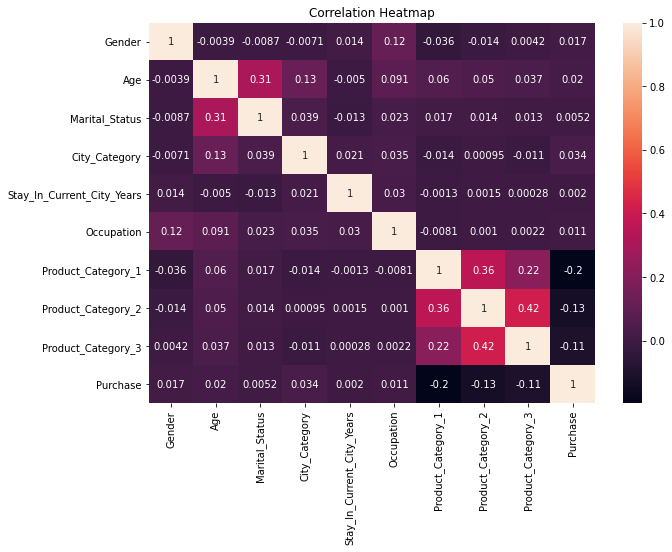

In [40]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')

The above correlation matrix helps to identify the realtionship between the features in the dataset.
- From the above heatmap, no two features are highly correlated.
- The features **Product_Category_1,Product_Category_2 and Product_Category_3**  are negatively correlated withe target variable "Purchase". Therefore, theese input variables can be excluded from **Modeling** 

## 2. Descriptive Statistics and Distribution of the Target Variable

In [41]:
print(f"Mean Purchase: {df['Purchase'].mean()}")
print(f"Median Purchase: {df['Purchase'].median()}")
print(f"Standard Deviation: {df['Purchase'].std()}")

Mean Purchase: 7850.211648411123
Median Purchase: 8047.0
Standard Deviation: 2120.4454615491904


- The above is the information about the descriptive statitics of the target variable.

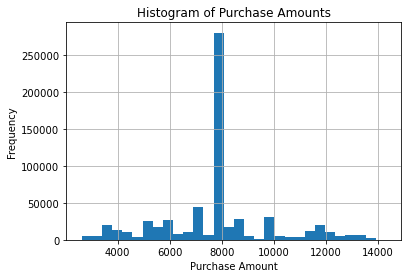

In [42]:
df['Purchase'].hist(bins=30)
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Purchase Amounts')
plt.show()

The above plot gives information abot the distribution of the feature 'Purchase'
- We can infer that most of the customers purchase value is around **8000.**

## 3. Gender and Purchase Analysis

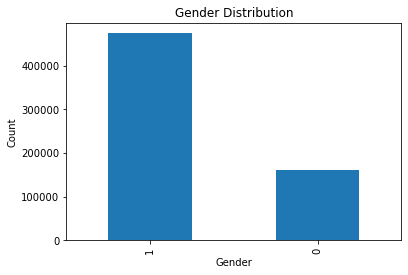

In [43]:
df['Gender'].value_counts().plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

The above bar plot gives information about the gender distribution
- Most of the purchases are made by **Male(1)** customers.
- The number of male customers are almost thrice the number of **female(0)** customers.

## 4. Demographic Segmentaion

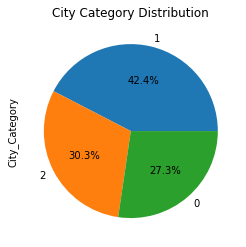

In [44]:
df['City_Category'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('City Category Distribution')
plt.show()

- 1: Metros - Metropolitan cities.
- 2: Tier 2 Cities - Smaller than metros, these are medium-sized cities. 
- 3: Tier 3 Cities - Small cities or towns with lower population density and relatively less advanced infrastructure.

From the above piechart, it is clear that most of the purchases are made by **Metropolitan** residents, while Tier 3 city residents account for the least

## 5. Purchase Behavior by Marital Status

In [45]:
purchase_by_ms = df.groupby('Marital_Status')['Purchase'].sum()
purchase_by_ms

Marital_Status
0    2.940193e+09
1    2.049449e+09
Name: Purchase, dtype: float64

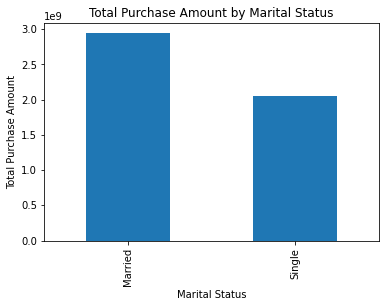

In [46]:
purchase_by_ms.plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Marital Status')
plt.xticks([0, 1], ['Married','Single'])  # 0 is for married and 1 is for single
plt.show()

The above plot gives insights into how marital status influences consumer behavior on Black Friday
- It is clear that married individuals made larger purchases over singles. This could be due to family needs or joint decision-making.

## 6. Purchase Behavior by Age group

This is a great way to understand how different age groups contribute to overall purchase amounts, which can be valuable for marketing strategies and product targeting.

In [47]:
purchase_by_age = df.groupby('Age')['Purchase'].sum()

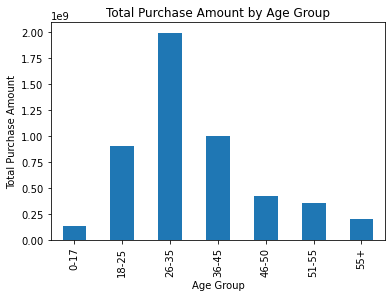

In [48]:
purchase_by_age.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Age Group')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.show()

From the above plot we can conclude that
- People in the age group (26-35) tend to spend the most money, while
- People in the older age group (55+) accounts for the least purchase amount.

## 7. Purchase Behavior by Occupation category

In [49]:
purchase_by_occ = df.groupby('Occupation')['Purchase'].sum()

Text(0.5, 1.0, 'Total Purchase Amount by Occupation category')

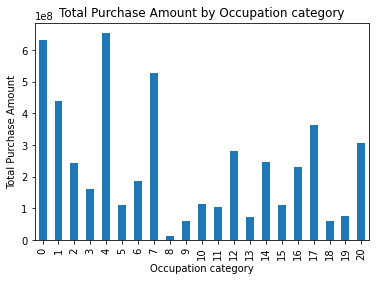

In [50]:
purchase_by_occ.plot(kind='bar')
plt.xlabel('Occupation category')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Occupation category')

From the above plot we can conclude that:
- The highest purchases are made by people whose occupation category is **0,4,7**
- While those whose occupation category is **8,9,13,18,19** accounts for the least 

## 8. Identifying Popular Product Categories

This insight helps in understanding consumer preferences and can guide inventory management and marketing strategies

In [51]:
total_cat_1 = df['Product_Category_1'].sum()
total_cat_2 = df['Product_Category_2'].sum()
total_cat_3 = df['Product_Category_3'].sum()

Text(0.5, 1.0, 'Total Sum of each Product Category')

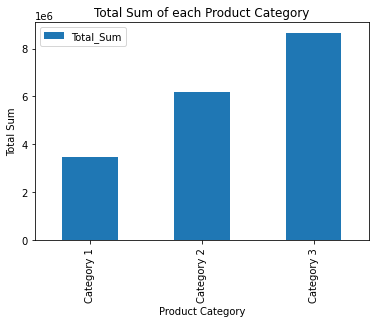

In [52]:
cat_totals = pd.DataFrame({'Product_Category': ['Category 1', 'Category 2', 'Category 3'],
                                'Total_Sum': [total_cat_1, total_cat_2, total_cat_3]})

cat_totals.plot.bar(x='Product_Category', y='Total_Sum')
plt.xlabel('Product Category')
plt.ylabel('Total Sum')
plt.title('Total Sum of each Product Category')

From the above plot it is evident that:
- Category 3 is most popular among the customers
- This indicates that Category 3 products are in high demand, followed  by Category 2 and 1 